In [32]:
import numpy as np
import matplotlib.pyplot as plt



In [33]:
#implement function taking X and K, that returns Phi(X)
#of shape NxK, which is the vandermore matrix associated with X

def vandermore(X, K):
    N=X.shape[0]
    phi=np.zeros((N,K))
    for j in range(K):
        phi[:,j]=X**j
    return phi

#X=np.random.randn(10,10)
X=[1,2,3,4]
X=np.array(X)
phi=vandermore(X, K=5)
print(phi)


[[  1.   1.   1.   1.   1.]
 [  1.   2.   4.   8.  16.]
 [  1.   3.   9.  27.  81.]
 [  1.   4.  16.  64. 256.]]


create dataset X_test

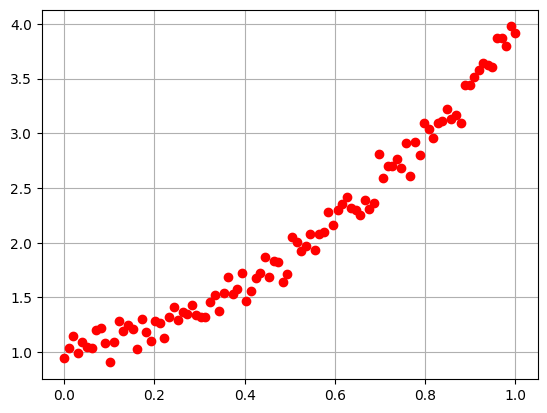

In [34]:
#create test problem
N=100 #n. of datapoints
K=4

a=0
b=1
#define true solution
theta_true=np.ones((K,))
X=np.linspace(a,b,N) #100 values equispaced from 0 to 1
#define Y such that theta_true is the solution of
#Phi(X)*theta=Y
phi=vandermore(X, K)
Y = phi @ theta_true 

#corrupt Y with noise (standard normal distribution with sigma=0.1)
sigma=0.1
Y=Y+sigma*np.random.normal(0,1,Y.shape)

#plot X against Y with red dots
plt.plot(X,Y, "o", color="red")
plt.grid()



# MLE
$\theta_{true}$ MLE using normal equations

(100, 4)


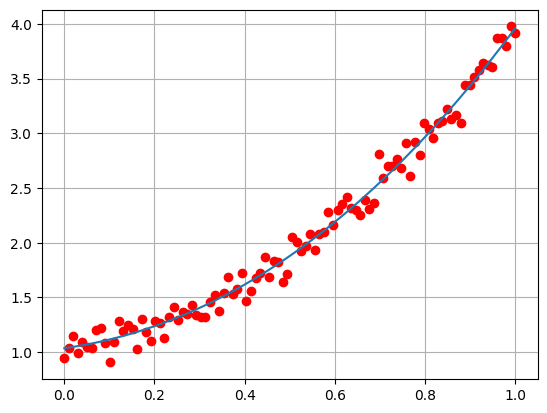

In [35]:
#given x and y compute a solution theta_mle
#print(np.linalg.inv(phi.T@phi)@phi.T@Y) #not efficient
theta_mle= np.linalg.solve(phi.T@phi, phi.T@Y) #using LU factiorization, more efficient
#the best is using cholesky 
#plot f_theta(X)
XX=np.linspace(a,b,1000)
YY=vandermore(XX,K)@theta_mle
plt.plot(X,Y, "ro")
print(phi.shape)
#f_theta=phi@theta_mle
plt.plot(XX,YY)
plt.grid()



In [36]:
#test error funciton with mean squared error
def test_Error(theta, phi, Y):
    result=np.linalg.norm(phi@theta-Y)**2
    N=Y.shape[0]
    return result/N

In [37]:
#a function that takes (X,Y) and K and returns theta_mle
def fit(D,K):#D=(X,Y)
    X,Y=D
    phi=vandermore(X,K)
    theta_mle= np.linalg.solve(phi.T@phi, phi.T@Y)
    return theta_mle

## different values of K

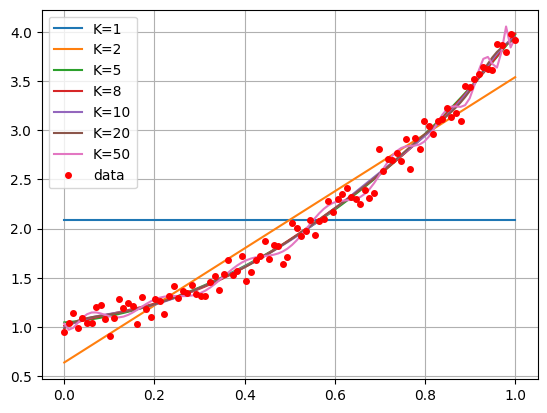

In [38]:
#we now want to UNDERFIT the model
#X and Y are fixed
#pretend to not know K -> we guess it
k_values=[1,2,5,8,10,20,50]
#solve MLE with difqferent K
for K_trial in k_values:
    phi_trial=vandermore(X, K_trial)
    theta_mle_t=np.linalg.solve(phi_trial.T@phi_trial, phi_trial.T@Y)
    plt.plot(X, phi_trial@theta_mle_t, label="K="+str(K_trial))

#plot new model as before with dataset
plt.plot(X,Y, "ro", markersize=4, label="data")
plt.legend()
plt.grid()

test and train error for different values of K

Text(0, 0.5, 'error')

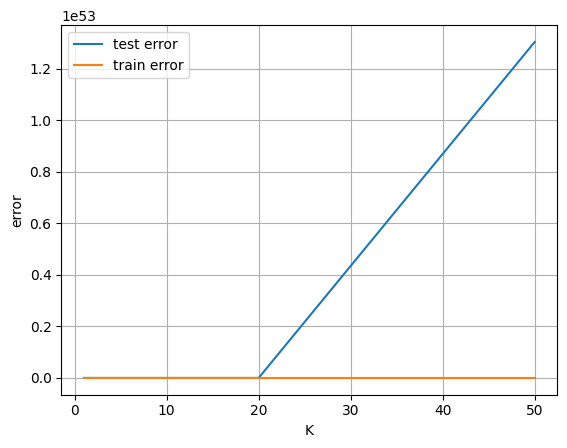

In [39]:
#sample points from interval (a,b) with normal distribution
X_test=np.random.normal(0,1,100)
#calculate Y_test as before, witj different K
test_error_mle=[]
train_error_mle=[]
for K_trial in k_values:
    theta_train=fit((X,Y), K_trial)
    Y_test=vandermore(X_test, K_trial)@theta_train
    theta_test=fit((X_test,Y_test), K_trial)
    phi_test=vandermore(X_test, K_trial)
    phi_train=vandermore(X, K_trial)
    test_error_mle.append(test_Error(theta_test, phi_test, Y))
    train_error_mle.append(test_Error(theta_train, phi_train, Y))
    
    #train_error_mle.append(test_Error(theta_mle, phi, Y))
#plot test and train errors
plt.plot(k_values, test_error_mle, label="test error")
plt.plot(k_values, train_error_mle, label="train error")
plt.legend()
plt.grid()
plt.xlabel("K")
plt.ylabel("error")



# MAP (maximum a posteriori) Estimation
function that takes (X,Y), K and lambda and returns the MAP estimate of theta

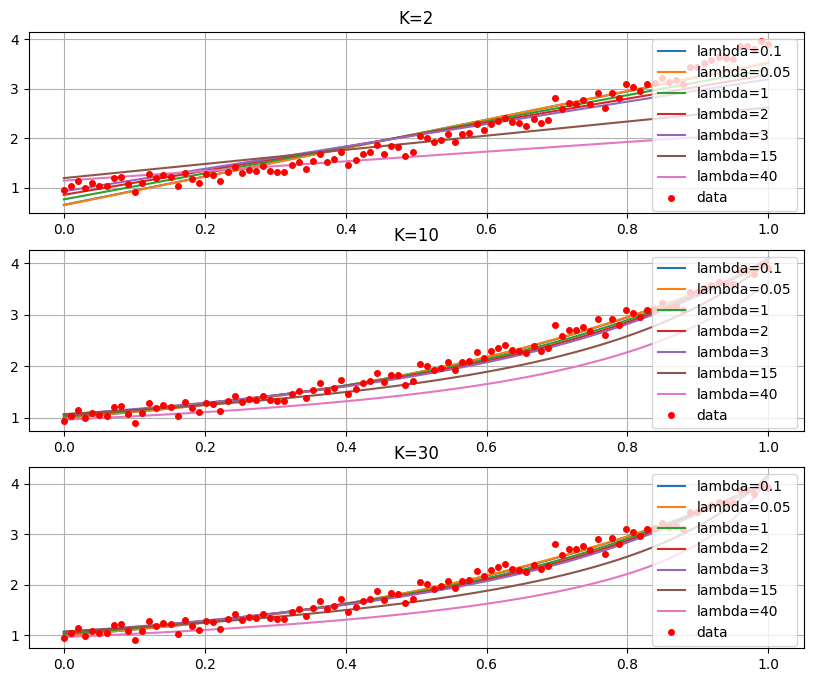

In [48]:
#for lambda too big we underfit, but underfitting is way easier to spot than overfit
def map_fit(D, K, l):
    X,Y=D
    #compute vandermore
    phi=vandermore(X,K)
    #solve theta_map
    theta_map=np.linalg.solve(phi.T@phi+l*np.identity(K),phi.T@Y)
    return theta_map
l_val=[0.1,.05,1,2,3,15,40]
k_val=[2,10,30]
#solve MAP with different lambda and k, for each k make a subplot
plt.figure(figsize=(10,8))
i=0
for K_trial in k_val:
    i+=1
    for l_trial in l_val:
        phi_trial=vandermore(X, K_trial)
        theta_map=map_fit((X,Y), K_trial, l_trial)
        plt.subplot(3,1, i)
        plt.plot(X, phi_trial@theta_map, label="lambda="+str(l_trial))
    plt.plot(X,Y, "ro", markersize=4, label="data")
    plt.grid()
    plt.legend()
    plt.title("K="+str(K_trial))
    



#usially lambda is a default paraeter almost never changed


For K being way greater than the correct degree of the polynomial (>>10), compute the MLE and MAP<br>
solution. Compare the test error of the two, for different values of λ (in the case of MAP).

In [50]:
K=100
for l in l_val:
    theta_map=map_fit((X,Y), K, l)
    map_error=test_Error(theta_map, phi, Y)
    theta_MLE=fit((X,Y), K)
    mle_error=test_Error(theta_MLE, phi, Y)
    print("lambda=", l, "map_error=", map_error, "mle_error=", mle_error)



ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 100 is different from 10)